## Raw Data

In [11]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Code Below - Reading in the data from the Fire-Incidents-Pittsburgh.csv Data file into a dataframe    
#### and organizing dataframe and organizing it into Neighborhoods and Number of Fire Incidents

In [12]:
data = pd.read_csv("Fire-Incidents-Pittsburgh.csv")

pd.set_option('display.max_rows', None)

# calc total number of fires in each neighborhood
fires_in_neighborhoods = data.groupby("neighborhood").size() 


d2 = pd.DataFrame( { "fire incidents" : fires_in_neighborhoods } )

d2.reset_index(inplace=True)
d2.index += 1

d2.columns = [ "Neighborhood" , "Number of Fire Incidents"]

print( d2 ) 


                 Neighborhood  Number of Fire Incidents
1            Allegheny Center                        62
2              Allegheny West                        42
3                   Allentown                       125
4                   Arlington                        51
5           Arlington Heights                        13
6                  Banksville                        59
7           Bedford Dwellings                        43
8                   Beechview                       146
9                 Beltzhoover                       129
10                 Bloomfield                       170
11                      Bluff                       141
12                    Bon Air                        22
13           Brighton Heights                       153
14                  Brookline                       187
15       California-Kirkbride                        39
16                    Carrick                       283
17  Central Business District                   

## Bar Chart

#### Code Below - Creates a bar graph with the Dataframe created in the previous code

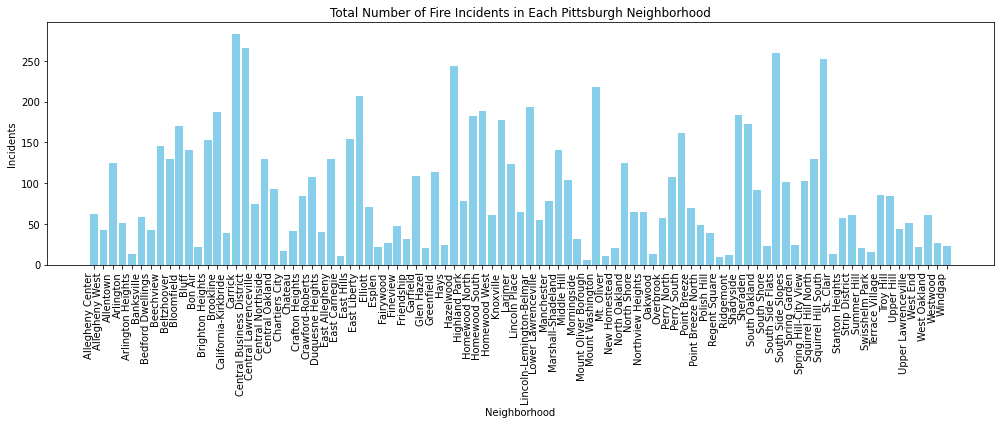

Neighborhoods with Less Than 50 Fire Incidents:
            Neighborhood  Number of Fire Incidents
2         Allegheny West                        42
5      Arlington Heights                        13
7      Bedford Dwellings                        43
12               Bon Air                        22
15  California-Kirkbride                        39
21        Chartiers City                        17
22               Chateau                        41
25      Duquesne Heights                        40
27         East Carnegie                        11
31                Esplen                        22
32             Fairywood                        26
33              Fineview                        48
34            Friendship                        32
36            Glen Hazel                        20
38                  Hays                        24
52           Morningside                        32
53  Mount Oliver Borough                         6
55            Mt. Oliver          

<Figure size 432x288 with 0 Axes>

In [13]:
# code from above which was using groupby to find the incidents per neighborhood 
fires_in_neighborhoods = data.groupby("neighborhood").size()

# Creating a DataFrame from the grouped data
neighborhood_counts = pd.DataFrame({'Neighborhood': fires_in_neighborhoods.index, 'Incident Count': fires_in_neighborhoods.values})

# Creating of the bar chart
plt.figure(figsize=(14, 6))
plt.bar(neighborhood_counts['Neighborhood'], neighborhood_counts['Incident Count'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Incidents')
plt.title('Total Number of Fire Incidents in Each Pittsburgh Neighborhood')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Auto-adjusts the layout to prevent overlapping of the nieghborhood names
plt.gcf().autofmt_xdate()
# filter neighborhoods with more than 150 fire incidents
more_den_150_incidents = d2[d2['Number of Fire Incidents'] < 50]

# Display neighborhoods with more than 150 fire incidents
print("Neighborhoods with Less Than 50 Fire Incidents:")
print(more_den_150_incidents)




## Incidents

In [14]:

# group data by incident type to get the total amount of each type
incident_type_count = data['type_description'].value_counts().reset_index(name='Total Count')

# print the list of fire incident types and their total
for idx, row in incident_type_count.iterrows():
    print(f"{row['index']}: {row['Total Count']}")


Cooking fire, confined to container: 2167
Building fire: 2004
Passenger vehicle fire: 1085
Outside rubbish, trash or waste fire: 745
Brush or brush-and-grass mixture fire: 571
Outside rubbish fire, Other: 548
Dumpster or other outside trash receptacle fire: 449
Trash or rubbish fire, contained: 435
Natural vegetation fire, Other: 255
Special outside fire, Other: 252
Mobile property (vehicle) fire, Other: 198
Fires in structure other than in a building: 134
Grass fire: 130
Fire, Other: 129
Outside equipment fire: 75
Fuel burner/boiler malfunction, fire confined: 61
Road freight or transport vehicle fire: 53
Chimney or flue fire, confined to chimney or flue: 51
Forest, woods or wildland fire: 38
Construction or demolition landfill fire: 27
Outside storage fire: 20
Off-road vehicle or heavy equipment fire: 15
Commercial Compactor fire, confined to rubbish: 14
Fire in portable building, fixed location: 12
Outside stationary compactor/compacted trash fire: 10
Incinerator overload or malfunc

## Pie Chart

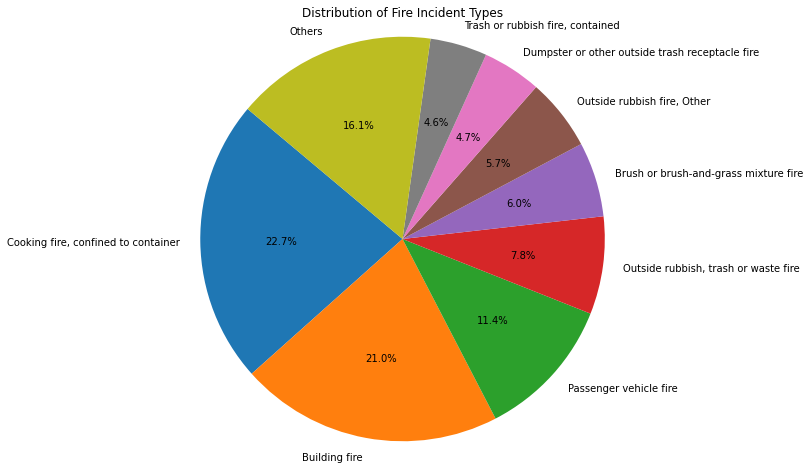

In [15]:
# calculate the count of each fire incident type
incident_type_count = data['type_description'].value_counts()

# threshold of 3% means any fire incident with 3% or less will not be displayed in the pie chart and will be grouped into the other category. this keeps the pie chart from smushing the information together making it illegible
threshold = 0.03

# group small categories into "Others"
small_categories = incident_type_count[incident_type_count / incident_type_count.sum() < threshold].index
incident_type_count['Others'] = incident_type_count[small_categories].sum()
incident_type_count = incident_type_count.drop(small_categories)

# plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(incident_type_count, labels=incident_type_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fire Incident Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()




## OTHER GROUP

In [16]:
incident_type_count = data['type_description'].value_counts()

threshold = 0.03

# group smaller categories below the threshold into "Others"
small_categories = incident_type_count[incident_type_count / incident_type_count.sum() < threshold].index
others_category = incident_type_count[incident_type_count.index.isin(small_categories)]

# print the incident types that make up the "Others" category
print("Incident types in 'Others' category:")
print(others_category)


Incident types in 'Others' category:
Natural vegetation fire, Other                        255
Special outside fire, Other                           252
Mobile property (vehicle) fire, Other                 198
Fires in structure other than in a building           134
Grass fire                                            130
Fire, Other                                           129
Outside equipment fire                                 75
Fuel burner/boiler malfunction, fire confined          61
Road freight or transport vehicle fire                 53
Chimney or flue fire, confined to chimney or flue      51
Forest, woods or wildland fire                         38
Construction or demolition landfill fire               27
Outside storage fire                                   20
Off-road vehicle or heavy equipment fire               15
Commercial Compactor fire, confined to rubbish         14
Fire in portable building, fixed location              12
Outside stationary compactor/compac

In [17]:
# group data by neighborhood and incident type to get the count of each type in every neighbohood
neighborhood_type_count = data.groupby(['neighborhood', 'type_description']).size().reset_index(name='Count')

# prints the number of fire incident types in neighborhoods in list format
neighborhood_names = neighborhood_type_count['neighborhood'].unique()
for neighborhood in neighborhood_names:
    print(f"{neighborhood}:")
    incidents = neighborhood_type_count[neighborhood_type_count['neighborhood'] == neighborhood]
    for idx, row in incidents.iterrows():
        print(f"- {row['type_description']}: {row['Count']}")
    print()


Allegheny Center:
- Brush or brush-and-grass mixture fire: 7
- Building fire: 2
- Cooking fire, confined to container: 17
- Dumpster or other outside trash receptacle fire: 5
- Fire in portable building, fixed location: 1
- Fire, Other: 1
- Fuel burner/boiler malfunction, fire confined: 1
- Mobile property (vehicle) fire, Other: 1
- Natural vegetation fire, Other: 5
- Outside equipment fire: 1
- Outside rubbish fire, Other: 3
- Outside rubbish, trash or waste fire: 7
- Passenger vehicle fire: 5
- Special outside fire, Other: 3
- Trash or rubbish fire, contained: 3

Allegheny West:
- Brush or brush-and-grass mixture fire: 6
- Building fire: 7
- Commercial Compactor fire, confined to rubbish: 2
- Cooking fire, confined to container: 2
- Dumpster or other outside trash receptacle fire: 5
- Grass fire: 1
- Natural vegetation fire, Other: 2
- Outside rubbish fire, Other: 2
- Outside rubbish, trash or waste fire: 3
- Passenger vehicle fire: 11
- Road freight or transport vehicle fire: 1

All

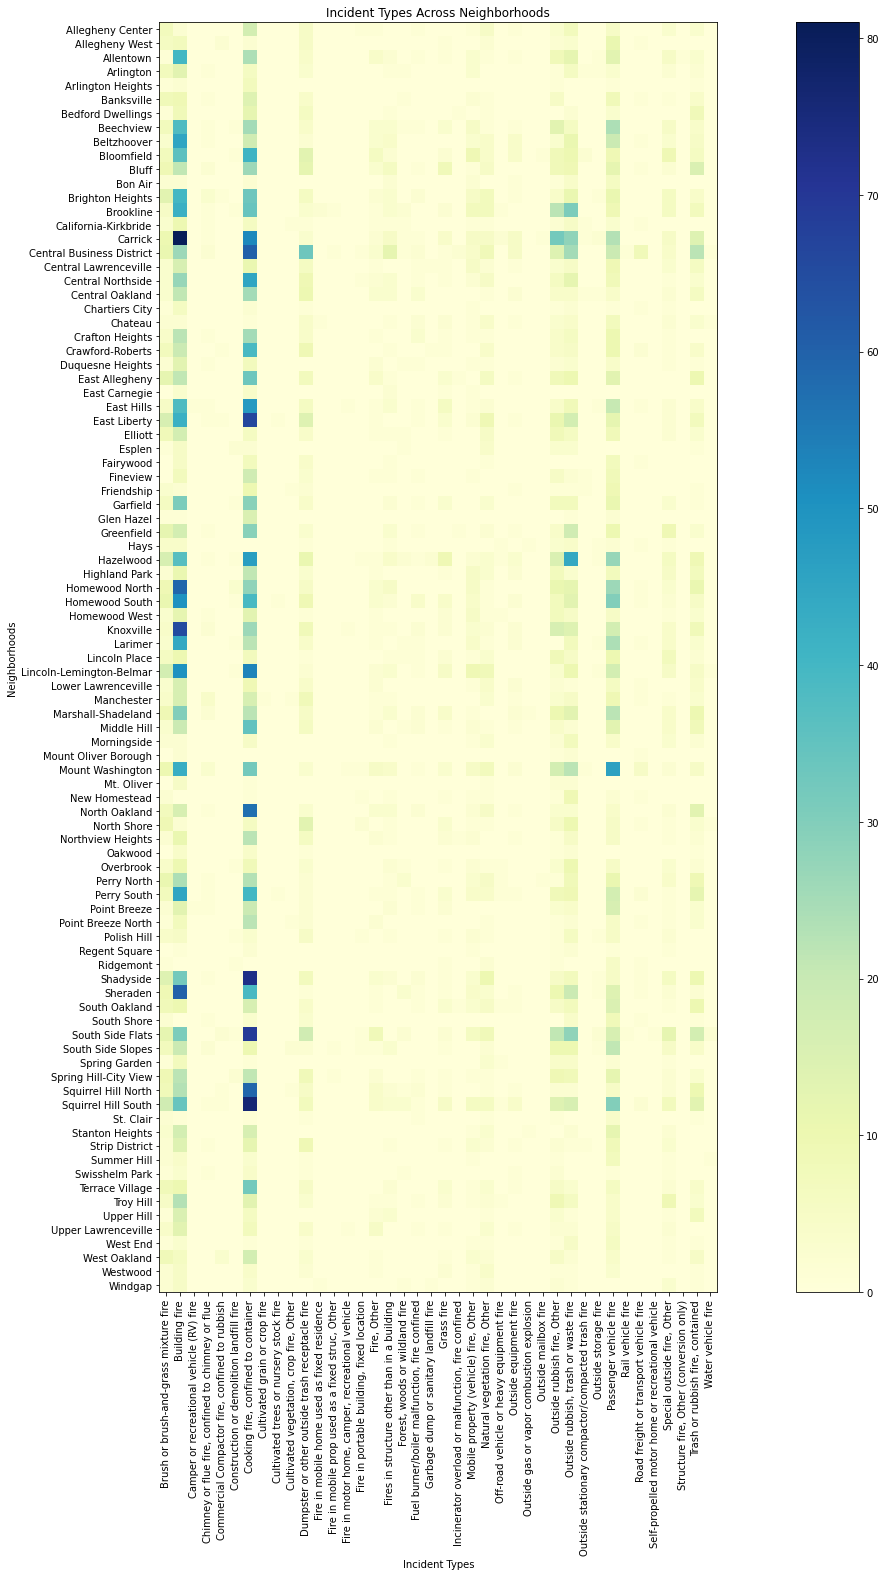

In [18]:
data = pd.read_csv("Fire-Incidents-Pittsburgh.csv")

# Group data by neighborhood and incident type to get the count of each type in every neighborhood
neighborhood_type_count = data.groupby(['neighborhood', 'type_description']).size().unstack(fill_value=0)

# plot a heatmap using Matplotlib
plt.figure(figsize=(22, 22))
heatmap = plt.imshow(neighborhood_type_count, cmap='YlGnBu', interpolation='nearest')
plt.title('Incident Types Across Neighborhoods')
plt.xlabel('Incident Types')
plt.ylabel('Neighborhoods')
plt.xticks(range(len(neighborhood_type_count.columns)), neighborhood_type_count.columns, rotation=90)
plt.yticks(range(len(neighborhood_type_count.index)), neighborhood_type_count.index)
plt.colorbar(heatmap)
plt.tight_layout()
plt.show()
